In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy import stats

In [1]:
from scipy.stats import skew, norm
import statsmodels.api as sm

In [4]:
# Load data using Id column as index
df = pd.read_csv('train.csv', index_col='Id')

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Separate data into train and test sets
df_train = df.sample(frac=0.75, random_state=0)
indexes = df_train.index
indexes = df.index.isin(indexes)

df_test = df[~indexes]

df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

In [7]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [9]:
X = numeric_df.drop('SalePrice', axis=1)
y = numeric_df[['SalePrice']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Impute missing values in train and test

In [11]:
X_train['LotFrontage'].fillna(0, inplace=True)
X_train['MasVnrArea'].fillna(0, inplace=True)
X_train['GarageYrBlt'].fillna(X_train['GarageYrBlt'].min(), inplace=True)

In [12]:
X_test['LotFrontage'].fillna(0, inplace=True)
X_test['MasVnrArea'].fillna(0, inplace=True)
X_test['GarageYrBlt'].fillna(X_train['GarageYrBlt'].min(), inplace=True)

### Some experiments using single decision trees

In [11]:
clf = tree.DecisionTreeRegressor(random_state=0)

In [12]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities 

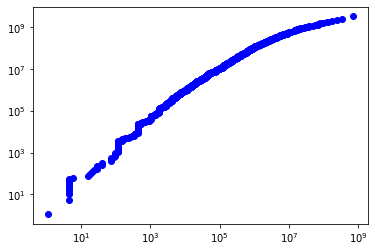

In [13]:
plt.loglog(ccp_alphas[:-1], impurities[0:-1], 'bo')

In [31]:
clfs = []
for ccp_alpha in ccp_alphas[900:1000]:
    clf = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

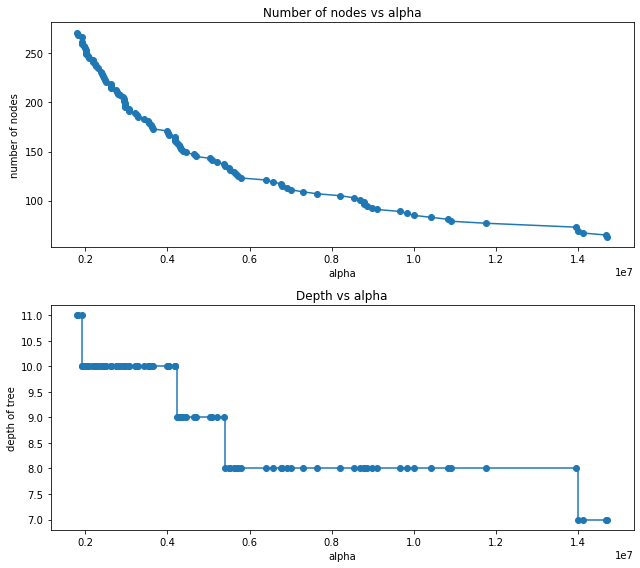

In [32]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(9,8))
ax[0].plot(ccp_alphas[900:1000], node_counts, marker="o")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas[900:1000], depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

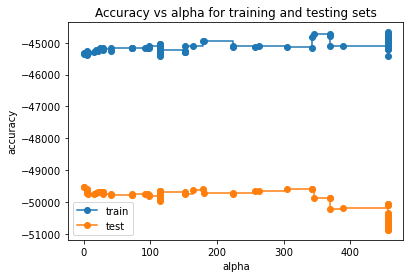

In [33]:
train_scores = [cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean() for clf in clfs]
test_scores = [cross_val_score(clf, X_test, y_test, cv=10, scoring='neg_root_mean_squared_error').mean() for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("RMSE")
ax.set_title("RMSE vs alpha for training and testing sets")
ax.plot(ccp_alphas[0:100], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[0:100], test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The estimated generalization error shows that decision trees with complexity pruning is not a very good model. Now, I try using random forests.

## Random forests

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [91]:
# Create a list of hyperparamaters a use cross.validation to select to best model.
n_estimators = [20, 50, 75, 100, 125, 150]
scores = []
for n_est in n_estimators:
    regr = RandomForestRegressor(n_estimators=n_est)
    #regr.fit(X_train, y_train)
    score = cross_val_score(regr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    #preds = regr.predict(X_test)
    #score = mean_absolute_error(y_test, preds)
    scores.append(score)

/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selec

/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selec

/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/betor94/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/model_selec

In [92]:
mean_scores =np.abs([np.mean(score) for score in scores])
std_scores =np.array([np.std(score) for score in scores])

(5000.0, 22000.0)

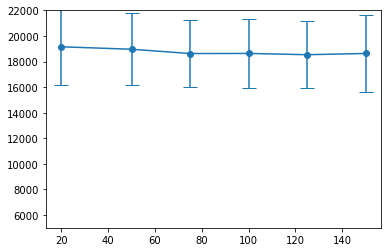

In [93]:
plt.errorbar(n_estimators, mean_scores, std_scores, marker='o', capsize=7)
plt.ylim((5e3, 22e3))

In [95]:
mean_scores

array([19152.21833542, 18959.72874437, 18624.47165038, 18630.78411122,
       18532.21451014, 18628.92642715])

In [96]:
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)

/tmp/ipykernel_17593/1518298774.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor()

In [99]:
X_train.columns[15]

'GrLivArea'

In [97]:
regr.feature_importances_

array([4.34254137e-03, 1.12084127e-02, 1.97935005e-02, 5.63319118e-01,
       5.79011461e-03, 1.55841882e-02, 1.11651847e-02, 6.07740712e-03,
       3.05838970e-02, 8.70596151e-04, 6.32159086e-03, 3.78884371e-02,
       2.78022966e-02, 3.11365601e-02, 4.39601910e-04, 1.22737817e-01,
       1.32116967e-03, 1.17217051e-04, 4.35567337e-03, 1.15367268e-03,
       2.25965539e-03, 8.15783510e-04, 8.22970425e-03, 5.01488072e-03,
       9.13076156e-03, 2.51546571e-02, 1.93372394e-02, 6.75392891e-03,
       9.07092731e-03, 9.62491638e-04, 6.34213347e-04, 2.80745841e-03,
       1.43140627e-03, 1.18048976e-04, 4.24171667e-03, 2.02812971e-03])

In [13]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error

In [101]:
r = permutation_importance(regr, X_test, y_test,
                           n_repeats=10,
                           random_state=0)

In [102]:
r.importances_mean

array([ 1.70024727e-03,  1.89572543e-03,  1.17927506e-02,  5.14372764e-01,
        5.27769279e-03,  9.68073892e-03,  5.28756605e-03,  1.32518676e-03,
        1.71529933e-02,  1.55753643e-04,  1.16949347e-03,  2.42782787e-02,
        1.53372874e-02,  2.44892801e-02,  3.24789346e-05,  1.20948218e-01,
       -1.09995771e-05,  4.64970676e-05,  3.39932714e-03,  8.19650862e-04,
        5.65605890e-04, -4.50241992e-05,  1.77354665e-03,  3.50098858e-03,
        2.60503771e-03,  2.52362867e-02,  6.48009597e-03, -5.71353270e-04,
        2.29173014e-04, -9.44161936e-05, -1.07631723e-04, -6.60242502e-04,
        3.26400966e-06,  4.27632029e-05,  3.84281936e-04,  6.13688731e-04])

In [14]:
# Train a ordinary least squares regressin model
X2_train = sm.add_constant(X_train.values)
X2_test = sm.add_constant(X_test.values)
est = sm.OLS(y_train, X2_train)
results = est.fit()

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     128.0
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:29:18   Log-Likelihood:                -12995.
No. Observations:                1095   AIC:                         2.606e+04
Df Residuals:                    1060   BIC:                         2.623e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.434e+05   1.66e+06     -0.147      0.883   -3.49e+06    3.01e+06
x1          -182.9556     30.875     -5.926      0.000    -243.539    -122.373
x2           -14.8935     32.924     -0.452      0.651     -79.497      49.711
x3             0.3809      0.106      3.577      0.000       0.172       0.590
x4          1.796e+04   1399.513     12.832      0.000    1.52e+04    2.07e+04
x5          3467.8094   1193.147      2.906      0.004    1126.610    5809.008
x6           408.3414     79.281      5.151      0.000     252.775     563.907
x7           217.7831     77.271      2.818      0.005      66.161     369.405
x8            20.3723      7.395      2.755      0.006       5.861      34.883
x9             7.8923      3.000      2.631      0.009       2.005      13.779
x10           -2.0479      5.546     -0.369      0.712     -12.931       8.835
x11           -0.5161      2.890     -0.179      0.858      -6.187       5.155
x12            5.3283      3.984      1.337      0.181      -2.490      13.147
x13            9.1506      7.176      1.275      0.203      -4.931      23.232
x14           11.8652      6.551      1.811      0.070      -0.989      24.720
x15           11.1998     17.203      0.651      0.515     -22.555      44.955
x16           32.2156      6.631      4.859      0.000      19.205      45.226
x17         1.177e+04   3044.376      3.865      0.000    5794.038    1.77e+04
x18        -1603.4503   4862.374     -0.330      0.742   -1.11e+04    7937.522
x19         4458.0278   3321.204      1.342      0.180   -2058.854     1.1e+04
x20        -1753.4579   3094.881     -0.567      0.571   -7826.248    4319.332
x21        -9237.3019   2012.598     -4.590      0.000   -1.32e+04   -5288.172
x22        -1.391e+04   6335.252     -2.196      0.028   -2.63e+04   -1478.114
x23         5316.6740   1461.140      3.639      0.000    2449.619    8183.729
x24         4085.9305   2069.396      1.974      0.049      25.352    8146.509
x25         -200.0565     72.904     -2.744      0.006    -343.109     -57.004
x26         1.465e+04   3399.032      4.311      0.000    7982.009    2.13e+04
x27            6.8507     11.993      0.571      0.568     -16.682      30.383
x28           25.0285      9.058      2.763      0.006       7.255      42.802
x29          -11.1267     16.862     -0.660      0.509     -44.214      21.961
x30            2.3404     19.652      0.119      0.905     -36.221      40.902
x31           43.5620     33.411      1.304      0.193     -21.997     109.121
x32           64.2793     19.912      3.228      0.001      25.208     103.351
x33          -29.4669     26.389     -1.117      0.264     -81.248      22.314
x34           -1.8764      3.344     -0.561      0.575      -8.438       4.685
x35          -60.1109    406.634     -0.148      0.883    -858.009     737.787
x3

In [16]:
# make predictions over test set
y_pred = results.predict(exog=X2_test)

In [17]:
print(mean_absolute_error(y_test, y_pred))

22062.285823135302


We note that Random Forest model is slightly better than the OLS regression

In [67]:
#Let's explore random forests. First, I will create encode categorical variables using Target encoding for high
#cardinality variables and one-hot encoding for low cardinality.

In [68]:
def target_encode_simple(df_train, df_valid, col, target):
    dt = df_train.groupby(col)[target].agg(['mean']).reset_index(drop=False)
    tmp = df_valid.merge(dt, on=col, how='left')['mean']
    return dt, tmp

In [116]:
dt = df_train.groupby('Neighborhood')['SalePrice'].agg(['mean']).reset_index(drop=False)
dt

,Neighborhood,mean
0,Blmngtn,183589.692308
1,BrDale,106615.384615
2,BrkSide,126553.977273
3,ClearCr,207401.454545
4,CollgCr,195850.211009
5,Crawfor,213921.690476
6,Edwards,127243.205128
7,Gilbert,192270.274510
8,IDOTRR,102964.884615
9,MeadowV,87125.000000


In [126]:
aux = df_test.merge(dt, on='Neighborhood', how='left')
x, y = aux['mean'][~aux['mean'].isna()], aux['SalePrice'][~aux['mean'].isna()]
np.corrcoef(x,y)

array([[1.        , 0.70323072],
       [0.70323072, 1.        ]])

In [11]:
aux_df = df_train.merge(dt, on='Neighborhood', how='left')

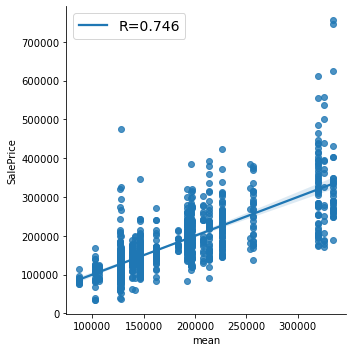

In [137]:
x, y = aux_df['mean'], aux_df['SalePrice']

def r2(x, y):
    return stats.pearsonr(x, y)[0] 

g = sns.lmplot(x='mean', y='SalePrice', data=aux_df, line_kws={'label':"Linear Reg"}, legend=True)

ax = g.axes[0,0]

ax.legend(fontsize=14)
leg = ax.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'R={0:.3f}'.format(r2(x,y))
L_labels[0].set_text(label_line_1)

We note that applying target encoding without a cross-validation method

In [80]:
from sklearn.model_selection import KFold

In [104]:
# define a function to apply target encoding using cross-validation

def target_encode_train(df_train, col, target, n_splits=5):
    kf = KFold(n_splits = n_splits, shuffle=False)
    
    folds = []
    for result in kf.split(df_train):
        dt = df_train.iloc[result[0]].groupby(col)[target].agg(['mean']).reset_index(drop=False)
        tmp = df_train.iloc[result[1]].merge(dt, on=col, how='left')['mean']
        folds.append(tmp)
        
    return folds

In [131]:
folds = target_encode_train(df_train, col='Neighborhood', target='SalePrice', n_splits=12)

In [132]:
df_train['Target_encoded_neighborhood'] = pd.concat([*folds]).reset_index(drop=True)

In [133]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Target_encoded_neighborhood
0,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624,216127.175000
1,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,8,2006,WD,Normal,133000,147266.852113
2,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,110000,129021.875000
3,280,60,RL,83.0,10005,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2008,WD,Normal,192000,208516.600000
4,656,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2010,WD,Family,88000,108166.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,138,90,RL,82.0,11070,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Family,171000,162442.866667
1091,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,102000,140851.619048
1092,1180,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Normal,93000,128009.852941
1093,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,192812.129630


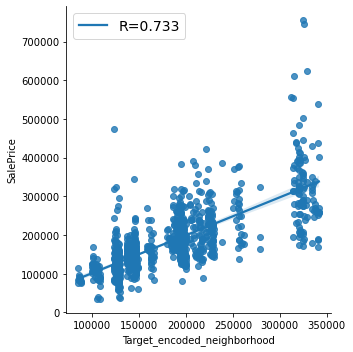

In [136]:
x, y = df_train['Target_encoded_neighborhood'], df_train['SalePrice']

def r2(x, y):
    return stats.pearsonr(x, y)[0] 

g = sns.lmplot(x='Target_encoded_neighborhood', y='SalePrice', data=df_train, line_kws={'label':"Linear Reg"}, legend=True)

ax = g.axes[0,0]

ax.legend(fontsize=14)
leg = ax.get_legend()
L_labels = leg.get_texts()

label_line_1 = r'R={0:.3f}'.format(r2(x,y))
L_labels[0].set_text(label_line_1)

In [138]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1095 non-null   int64  
 1   MSSubClass                   1095 non-null   int64  
 2   MSZoning                     1095 non-null   object 
 3   LotFrontage                  907 non-null    float64
 4   LotArea                      1095 non-null   int64  
 5   Street                       1095 non-null   object 
 6   Alley                        75 non-null     object 
 7   LotShape                     1095 non-null   object 
 8   LandContour                  1095 non-null   object 
 9   Utilities                    1095 non-null   object 
 10  LotConfig                    1095 non-null   object 
 11  LandSlope                    1095 non-null   object 
 12  Neighborhood                 1095 non-null   object 
 13  Condition1        

In [130]:
df_train['Neighborhood'].value_counts()

NAmes      162
CollgCr    109
OldTown     91
Edwards     78
Somerst     68
NridgHt     61
NWAmes      58
Sawyer      52
Gilbert     51
BrkSide     44
SawyerW     43
Crawfor     42
NoRidge     35
Mitchel     35
Timber      28
IDOTRR      26
SWISU       23
ClearCr     22
StoneBr     18
BrDale      13
Blmngtn     13
MeadowV     12
Veenker      6
NPkVill      5
Name: Neighborhood, dtype: int64

In [91]:
len(folds[1])

219

In [14]:
len(ccp_alphas)

1031

In [16]:
ccp_alphas[-200]

778888.8069738606